Assignment-**1**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/RoadSafety_Nov25/data/raw/US_Accidents_March23.csv'
us_accidents_df = pd.read_csv(dataset_path)

1. How many unique values are there in categorical columns like City, State, and Weather_Condition? Which category is the most frequent in each?

In [10]:
city_unique = us_accidents_df['City'].nunique()
city_most_freq = us_accidents_df['City'].value_counts().idxmax()
city_most_freq_count = us_accidents_df['City'].value_counts().max()

print("Column: City")
print(f"Unique values of City: {city_unique}")
print(f"Most frequent category in City : {city_most_freq} ({city_most_freq_count} occurrences)")
print("-" * 50)

# --- State ---
state_unique = us_accidents_df['State'].nunique()
state_most_freq = us_accidents_df['State'].value_counts().idxmax()
state_most_freq_count = us_accidents_df['State'].value_counts().max()

print("Column: State")
print(f"Unique values of State: {state_unique}")
print(f"Most frequent category in state : {state_most_freq} ({state_most_freq_count} occurrences)")
print("-" * 50)

# --- Weather_Condition ---
weather_unique = us_accidents_df['Weather_Condition'].nunique()
weather_most_freq = us_accidents_df['Weather_Condition'].value_counts().idxmax()
weather_most_freq_count = us_accidents_df['Weather_Condition'].value_counts().max()

print("Column: Weather_Condition")
print(f"Unique values of Wheather_condition : {weather_unique}")
print(f"Most frequent category in Wheather_condition : {weather_most_freq} ({weather_most_freq_count} occurrences)")
print("-" * 50)



Column: City
Unique values of City: 13678
Most frequent category in City : Miami (186917 occurrences)
--------------------------------------------------
Column: State
Unique values of State: 49
Most frequent category in state : CA (1741433 occurrences)
--------------------------------------------------
Column: Weather_Condition
Unique values of Wheather_condition : 144
Most frequent category in Wheather_condition : Fair (2560802 occurrences)
--------------------------------------------------


2. Calculate the percentage of missing values in each column and list columns with more than 5% missing data.

In [11]:
missing_percentage = (us_accidents_df.isnull().sum() / len(us_accidents_df)) * 100

print("Percentage of missing values in each column:")
print(missing_percentage)

print("\nColumns with more than 5% missing data:")
print(missing_percentage[missing_percentage > 5])


Percentage of missing values in each column:
ID                        0.000000
Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  44.029355
End_Lng                  44.029355
Distance(mi)              0.000000
Description               0.000065
Street                    0.140637
City                      0.003274
County                    0.000000
State                     0.000000
Zipcode                   0.024779
Country                   0.000000
Timezone                  0.101030
Airport_Code              0.292881
Weather_Timestamp         1.555666
Temperature(F)            2.120143
Wind_Chill(F)            25.865904
Humidity(%)               2.253301
Pressure(in)              1.820288
Visibility(mi)            2.291524
Wind_Direction            2.267043
Wind_Speed(mph)           7.391355
Precipitat

3. Convert Start_Time and End_Time columns to datetime objects. Find the range (earliest and latest) of accident start times in the dataset.

In [23]:
# Try parsing with mixed formats (handles nanoseconds, ISO8601, etc.)
us_accidents_df['Start_Time'] = pd.to_datetime(us_accidents_df['Start_Time'], format='mixed', errors='coerce')
us_accidents_df['End_Time']   = pd.to_datetime(us_accidents_df['End_Time'], format='mixed', errors='coerce')

# Check if any values failed to convert
print("Unparsed Start_Time values:", us_accidents_df['Start_Time'].isna().sum())
print("Unparsed End_Time values:", us_accidents_df['End_Time'].isna().sum())

# Find the earliest and latest accident start times
earliest_start = us_accidents_df['Start_Time'].min()
latest_start   = us_accidents_df['Start_Time'].max()

print("\nEarliest accident recorded at:", earliest_start)
print(" Latest accident recorded at:", latest_start)

Unparsed Start_Time values: 0
Unparsed End_Time values: 0

Earliest accident recorded at: 2016-01-14 20:18:33
 Latest accident recorded at: 2023-03-31 23:30:00


4. Identify any duplicate records in the dataset based on all columns. How many duplicates exist and how will you handle them?

In [25]:
#Identifying the duplicate values
duplicates = us_accidents_df.duplicated()

# Count how many duplicate rows exist
num_duplicates = duplicates.sum()
print(f" Number of duplicate records in the dataset: {num_duplicates}")

# Optionally, display the duplicate rows
print("\nDuplicate records are :")
print(us_accidents_df[duplicates])

# --- Handling duplicates ---
# If you want to remove them:
df_cleaned = us_accidents_df.drop_duplicates()

print(f"\n Dataset after removing duplicates has {len(df_cleaned)} rows (original had {len(us_accidents_df)} rows).")

 Number of duplicate records in the dataset: 0

Duplicate records are :
Empty DataFrame
Columns: [ID, Source, Severity, Start_Time, End_Time, Start_Lat, Start_Lng, End_Lat, End_Lng, Distance(mi), Description, Street, City, County, State, Zipcode, Country, Timezone, Airport_Code, Weather_Timestamp, Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Direction, Wind_Speed(mph), Precipitation(in), Weather_Condition, Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop, Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight]
Index: []

[0 rows x 46 columns]

 Dataset after removing duplicates has 7728394 rows (original had 7728394 rows).


5. Explore the distribution of accident severity (Severity column). What percentage of accidents belong to each severity level? Visualize this distribution with a pie chart.

 Percentage of accidents by severity level:
Severity 2: 79.67%
Severity 3: 16.81%
Severity 4: 2.65%
Severity 1: 0.87%


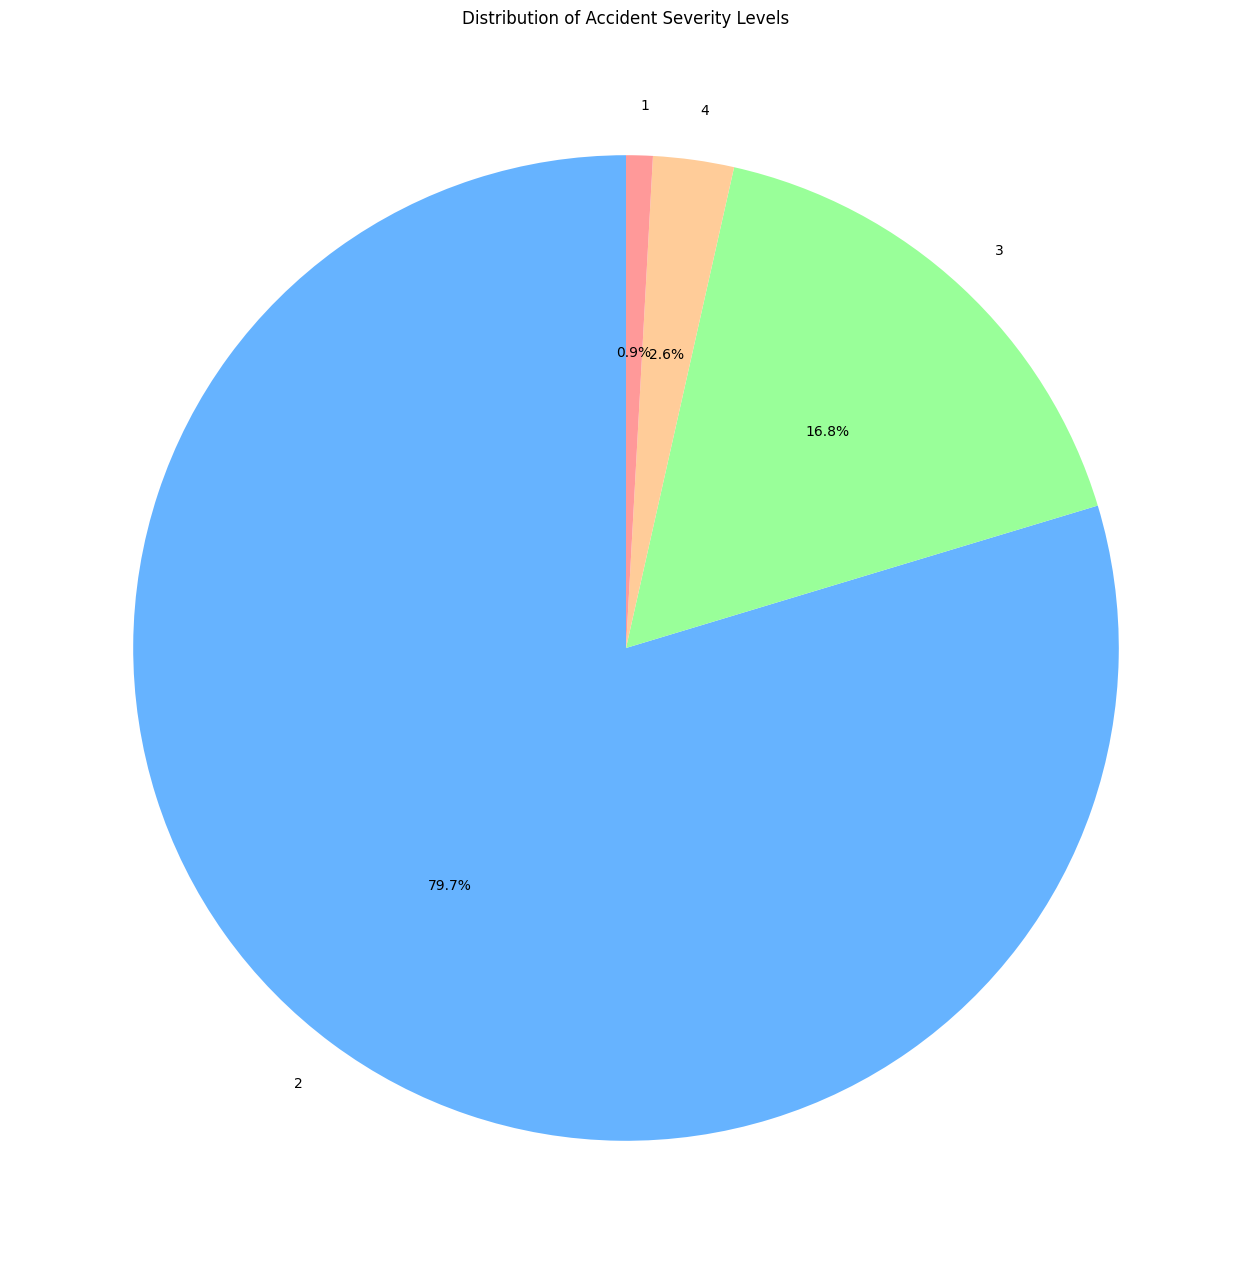

In [37]:
severity_counts = us_accidents_df['Severity'].value_counts(normalize=True) * 100

print(" Percentage of accidents by severity level:")
for level, pct in severity_counts.items():
    print(f"Severity {level}: {pct:.2f}%")

# --- Visualization: Pie Chart ---
plt.figure(figsize=(16,16))
plt.pie(severity_counts, labels=severity_counts.index,
        autopct='%1.1f%%',
        startangle=90, colors=['#66b3ff','#99ff99','#ffcc99','#ff9999'])
plt.title("Distribution of Accident Severity Levels")
plt.show()
